In [1]:
import pandas as pd
import evalml

pandas.core.index is deprecated and will be removed in a future version. The public classes are available in the top-level namespace.


In [2]:
df = pd.read_csv('final.csv')

In [3]:
df.head()

,Unnamed: 0,tn12,tn13,tn13.1,SoH
0,0,2.92982,18.68882,15.759,0.969182
1,1,2.92400,18.77300,15.849,0.970000
2,2,2.95300,18.85200,15.899,0.970545
3,3,3.00000,18.87000,15.870,0.971091
4,4,2.99000,18.93000,15.940,0.971545


In [4]:
df.drop('Unnamed: 0', axis=1)

,tn12,tn13,tn13.1,SoH
0,2.92982,18.68882,15.759,0.969182
1,2.92400,18.77300,15.849,0.970000
2,2.95300,18.85200,15.899,0.970545
3,3.00000,18.87000,15.870,0.971091
4,2.99000,18.93000,15.940,0.971545
...,...,...,...,...
5492,1.00000,7.00000,6.000,0.803027
5493,1.00000,7.00000,6.000,0.802191
5494,1.00000,7.00000,6.000,0.801573
5495,1.00000,7.00000,6.000,0.801073


In [5]:
X=df.drop('SoH',axis=1)
y=df['SoH']

In [6]:
X.head()

,Unnamed: 0,tn12,tn13,tn13.1
0,0,2.92982,18.68882,15.759
1,1,2.92400,18.77300,15.849
2,2,2.95300,18.85200,15.899
3,3,3.00000,18.87000,15.870
4,4,2.99000,18.93000,15.940


In [8]:
X_train,X_test,y_train,y_test=evalml.preprocessing.split_data(X,y,problem_type='regression')


In [9]:
X_train.head()

,Unnamed: 0,tn12,tn13,tn13.1
2729,2729,5.0,18.0,13.0
2976,2976,4.0,10.0,6.0
1458,1458,2.0,18.0,16.0
507,507,3.0,18.0,15.0
1564,1564,2.0,18.0,16.0


In [10]:
from evalml import AutoMLSearch
automl=AutoMLSearch(X_train=X_train,y_train=y_train,problem_type='regression', verbose=True)


AutoMLSearch will use mean CV score to rank pipelines.
Using default limit of max_batches=3.



In [11]:
automl.search(interactive_plot=False)


*****************************
* Beginning pipeline search *
*****************************

Optimizing for R2. 
Greater score is better.

Using SequentialEngine to train and score pipelines.
Searching up to 3 batches for a total of None pipelines. 
Allowed model families: 

Evaluating Baseline Pipeline: Mean Baseline Regression Pipeline
Mean Baseline Regression Pipeline:
	Starting cross validation
	Finished cross validation - mean R2: -0.001

*****************************
* Evaluating Batch Number 1 *
*****************************



c:\Users\rocks\anaconda3\envs\test\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.079e-04, tolerance: 4.516e-04

c:\Users\rocks\anaconda3\envs\test\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.058e-04, tolerance: 4.487e-04



Elastic Net Regressor w/ Replace Nullable Types Transformer + Imputer + Standard Scaler:
	Starting cross validation
	Finished cross validation - mean R2: 0.729
Random Forest Regressor w/ Replace Nullable Types Transformer + Imputer:
	Starting cross validation
	Finished cross validation - mean R2: 0.959

*****************************
* Evaluating Batch Number 2 *
*****************************

Elastic Net Regressor w/ Replace Nullable Types Transformer + Imputer + Standard Scaler + RF Regressor Select From Model:
	Starting cross validation
	Finished cross validation - mean R2: 0.701
Random Forest Regressor w/ Replace Nullable Types Transformer + Imputer + RF Regressor Select From Model:
	Starting cross validation
	Finished cross validation - mean R2: 0.959

*****************************
* Evaluating Batch Number 3 *
*****************************

Decision Tree Regressor w/ Replace Nullable Types Transformer + Imputer + Select Columns Transformer:
	Starting cross validation
	Finished cro

{1: {'Elastic Net Regressor w/ Replace Nullable Types Transformer + Imputer + Standard Scaler': '00:00',
  'Random Forest Regressor w/ Replace Nullable Types Transformer + Imputer': '00:00',
  'Total time of batch': '00:01'},
 2: {'Elastic Net Regressor w/ Replace Nullable Types Transformer + Imputer + Standard Scaler + RF Regressor Select From Model': '00:00',
  'Random Forest Regressor w/ Replace Nullable Types Transformer + Imputer + RF Regressor Select From Model': '00:01',
  'Total time of batch': '00:01'},
 3: {'Decision Tree Regressor w/ Replace Nullable Types Transformer + Imputer + Select Columns Transformer': '00:00',
  'Extra Trees Regressor w/ Replace Nullable Types Transformer + Imputer + Select Columns Transformer': '00:00',
  'XGBoost Regressor w/ Replace Nullable Types Transformer + Imputer + Select Columns Transformer': '00:01',
  'CatBoost Regressor w/ Replace Nullable Types Transformer + Imputer + Select Columns Transformer': '00:00',
  'LightGBM Regressor w/ Replace

In [12]:
automl.rankings

,id,pipeline_name,search_order,validation_score,mean_cv_score,standard_deviation_cv_score,percent_better_than_baseline,high_variance_cv,parameters
0,7,XGBoost Regressor w/ Replace Nullable Types Tr...,7,0.994530,0.994530,0.001321,74778.704779,False,{'Imputer': {'categorical_impute_strategy': 'm...
1,2,Random Forest Regressor w/ Replace Nullable Ty...,2,0.959055,0.959055,0.001546,72114.927251,False,{'Imputer': {'categorical_impute_strategy': 'm...
2,4,Random Forest Regressor w/ Replace Nullable Ty...,4,0.959043,0.959043,0.004265,72114.051940,False,{'Imputer': {'categorical_impute_strategy': 'm...
3,9,LightGBM Regressor w/ Replace Nullable Types T...,9,0.947459,0.947459,0.008159,71244.211548,False,{'Imputer': {'categorical_impute_strategy': 'm...
4,5,Decision Tree Regressor w/ Replace Nullable Ty...,5,0.946998,0.946998,0.011924,71209.579149,False,{'Imputer': {'categorical_impute_strategy': 'm...
5,6,Extra Trees Regressor w/ Replace Nullable Type...,6,0.913871,0.913871,0.013171,68722.094949,False,{'Imputer': {'categorical_impute_strategy': 'm...
6,1,Elastic Net Regressor w/ Replace Nullable Type...,1,0.728888,0.728888,0.087514,54831.793874,False,{'Imputer': {'categorical_impute_strategy': 'm...
7,3,Elastic Net Regressor w/ Replace Nullable Type...,3,0.701247,0.701247,0.101758,52756.287636,False,{'Imputer': {'categorical_impute_strategy': 'm...
8,8,CatBoost Regressor w/ Replace Nullable Types T...,8,0.376553,0.376553,0.007185,28375.172545,False,{'Imputer': {'categorical_impute_strategy': 'm...
9,0,Mean Baseline Regression Pipeline,0,-0.001332,-0.001332,0.001241,0.000000,False,{'Baseline Regressor': {'strategy': 'mean'}}


In [13]:
automl.best_pipeline

pipeline = RegressionPipeline(component_graph={'Replace Nullable Types Transformer': ['Replace Nullable Types Transformer', 'X', 'y'], 'Imputer': ['Imputer', 'Replace Nullable Types Transformer.x', 'Replace Nullable Types Transformer.y'], 'Select Columns Transformer': ['Select Columns Transformer', 'Imputer.x', 'Replace Nullable Types Transformer.y'], 'XGBoost Regressor': ['XGBoost Regressor', 'Select Columns Transformer.x', 'Replace Nullable Types Transformer.y']}, parameters={'Imputer':{'categorical_impute_strategy': 'most_frequent', 'numeric_impute_strategy': 'mean', 'boolean_impute_strategy': 'most_frequent', 'categorical_fill_value': None, 'numeric_fill_value': None, 'boolean_fill_value': None}, 'Select Columns Transformer':{'columns': ['Unnamed: 0', 'tn13']}, 'XGBoost Regressor':{'eta': 0.1, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 100, 'n_jobs': -1}}, random_seed=0)

In [14]:
best_pipeline = automl.best_pipeline

In [26]:
automl.describe_pipeline(7)


**************************************************************************************************
* XGBoost Regressor w/ Replace Nullable Types Transformer + Imputer + Select Columns Transformer *
**************************************************************************************************

Problem Type: regression
Model Family: XGBoost

Pipeline Steps
1. Replace Nullable Types Transformer
2. Imputer
	 * categorical_impute_strategy : most_frequent
	 * numeric_impute_strategy : mean
	 * boolean_impute_strategy : most_frequent
	 * categorical_fill_value : None
	 * numeric_fill_value : None
	 * boolean_fill_value : None
3. Select Columns Transformer
	 * columns : ['Unnamed: 0', 'tn13']
4. XGBoost Regressor
	 * eta : 0.1
	 * max_depth : 6
	 * min_child_weight : 1
	 * n_estimators : 100
	 * n_jobs : -1

Training
Training for regression problems.
Total training time (including CV): 1.9 seconds

Cross Validation
----------------
               R2  ExpVariance  MaxError  MedianAE   MSE 

In [21]:
best_pipeline.score(X_test, y_test, objectives=[ 'root mean squared error'])

OrderedDict([('Root Mean Squared Error', 0.002640147325949338)])

In [20]:
evalml.objectives.get_all_objective_names()

['expvariance',
 'maxerror',
 'medianae',
 'mse',
 'mae',
 'r2',
 'mean squared log error',
 'root mean squared log error',
 'root mean squared error',
 'mean absolute percentage error',
 'mcc multiclass',
 'log loss multiclass',
 'auc weighted',
 'auc macro',
 'auc micro',
 'recall weighted',
 'recall macro',
 'recall micro',
 'precision weighted',
 'precision macro',
 'precision micro',
 'f1 weighted',
 'f1 macro',
 'f1 micro',
 'balanced accuracy multiclass',
 'accuracy multiclass',
 'mcc binary',
 'log loss binary',
 'gini',
 'auc',
 'recall',
 'precision',
 'f1',
 'balanced accuracy binary',
 'accuracy binary',
 'sensitivity at low alert rates',
 'lead scoring',
 'fraud cost',
 'cost benefit matrix']

In [22]:
best_pipeline.save('model.pkl')

In [31]:
model = automl.load('model.pkl')
model.predict(X_test)

1294    0.962729
5321    0.908424
3842    0.949698
3553    0.963908
15      0.972679
          ...   
1567    0.949923
3667    0.957140
5493    0.802611
4579    0.974851
1826    0.930770
Name: SoH, Length: 1100, dtype: float64

In [27]:
best_pipeline.score(X_test, y_test, objectives=[ 'R2'])

OrderedDict([('R2', 0.9952560920150003)])

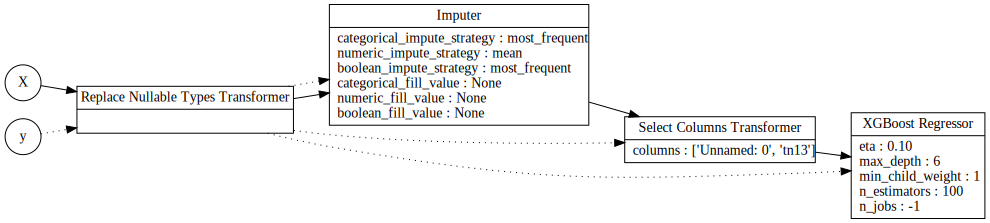

In [29]:
best_pipeline.graph()